In [1]:
from eocene_creator import EoceneOIFS
import xarray as xr
import pandas as pd

eocene = EoceneOIFS(
    idir="/home/ecme3497/hpcperm/ece4-database/",
    odir="/home/ecme3497/hpcperm/ece4-database-eoc/",
    herold="/home/ecme3497/hpcperm/herold-et-al-2014/Supp"
)

vegetation = xr.open_dataset(eocene.prepare_vegetation_zhang())
landsea =xr.open_dataset(eocene.prepare_herold(flag="landsea_mask"))
eocene.create_init(landsea=landsea['landsea_mask'], tvl=vegetation['tvl'], tvh=vegetation['tvh'])

woa_file = ("/home/ecme3497/hpcperm/ece4-database-eoc/nemo/initial/woa13-levitus-L31-eoc.nc")
domain_file = ("/home/ecme3497/hpcperm/ece4-database-eoc/nemo/domain/PALEORCA2/domain_cfg.nc")
output_file="/home/ecme3497/hpcperm/ece4-database-eoc/nemo/initial/woa13-init-new.nc"

woa_ds = eocene.create_ocean_init(woa_file, domain_file, output_file=output_file)

Converting to netcdf file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIT
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIT using function modify_value
Modifying variable sdfor in the field
Modifying variable anor in the field
Modifying variable isor in the field
Modifying variable slor in the field
Modifying variable cl in the field
Modifying variable chnk in the field
Modifying variable cvh in the field
Modifying variable cvl in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.339401.20250825_143324.532/cdoPyxv446m0a
Converting to netcdf file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/19900101/ICMGGECE4INIT
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/19900101/ICMGGECE4INIT using function replace_value
Replacing variable tvh in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.339401.20250825_143324.532/cdoPya_g2crq8
Converti

/lus/h2resw01/hpcperm/ecme3497/github/ecearth-quests/epochal/OIFS/eocene_creator.py:612: UserWarning: The specified chunks separate the stored chunks along dimension "z" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  woa = xr.open_dataset(woa_file, chunks={"z": 1})


In [3]:
eocene.create_sic()
eocene.create_sst()

In [5]:

orog = xr.open_dataset(eocene.prepare_herold(flag="orography"))
eocene.create_sh(orog=orog['orography'])


Converting to netcdf file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMSHECE4INIT
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMSHECE4INIT using function replace_value
Replacing variable z in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPyw8qu36zi
t,d,vo,lnsp


In [6]:

eocene.create_iniua()

Converting to netcdf file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIUA
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIUA using function modify_value
Modifying variable q in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPy_enxgjhm


In [7]:
eocene.create_climate()

Converting to netcdf file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_al.grb
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_al.grb using function modify_value
Modifying variable al in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPy130nvaxs
Converting to netcdf file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_aluvp.grb
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_aluvp.grb using function modify_value
Modifying variable aluvp in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPyyc8x6rxo
Converting to netcdf file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_aluvd.grb
Modifying GRIB file /home/ecme3497/hpcperm/ece4-database-eoc/oifs/TL63L31/climate.v

In [8]:
import numpy as np
import xarray as xr
import os
from utils import modify_single_grib, truncate_grib_file, modify_value, replace_value
from cdo import Cdo
cdo = Cdo()
cdo.debug = True




indir='/ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/19900101'
climate_indir='/ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/climate.v020'
#outdir='/lus/h2resw01/scratch/ccpd/OIFS-playground'
outdir='/ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/19900101'
climate_outdir='/ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020'
amip_outdir = '/ec/res4/hpcperm/ecme3497/ece4-database-eoc/amip-forcing'
amip_indir = '/ec/res4/hpcperm/ecme3497/ece4-database/amip-forcing'
herold_dir = '/home/ecme3497/hpcperm/herold-et-al-2014/Supp'

icefield = xr.open_dataset(os.path.join(amip_indir, 'siconcbcs_input4MIPs_IZM_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc'))
icefield['siconcbcs'] = icefield['siconcbcs']*0.0
outfile = os.path.join(amip_outdir, 'siconcbcs_input4MIPs_IZM_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc')
if os.path.exists(outfile):
    os.remove(outfile)
icefield.to_netcdf(outfile)


In [9]:
orog = xr.open_dataset(os.path.join(herold_dir, 'orography_remap.nc'))
landsea = xr.open_dataset(os.path.join(herold_dir, 'landsea_mask_remap.nc'))

In [10]:
landsea['landsea_mask'].expand_dims('time', axis=0)

<xarray.DataArray 'landsea_mask' (time: 1, lat: 64, lon: 128)> Size: 66kB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 512B 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: time
Attributes:
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  32

In [11]:

def generate_seasonal_sst(inputfile, outputfile, A=25, OFFSET=20, T0=5):
    """
    Generate a seasonal SST latitudinal pattern and save it to a netCDF file.
    Parameters:
    - inputfile: Path to the input netCDF file.
    - outputfile: Path to the output netCDF file.
    - A: Amplitude of the latitudinal SST pattern.
    - OFFSET: Phase offset in degree for the seasonal pattern.
    - T0: Mean temperature.
    """

    sstfield = xr.open_dataset(inputfile)
    sstfield['tosbcs'].shape
    lons = sstfield['lon'].values
    lats = sstfield['lat'].values
    lon2d, lat2d = np.meshgrid(lons, lats)

    # Sinusoidal parameters
    A = 25        # Amplitude in degrees Celsius
    #B = 5      # Amplitude in degrees Celsius
    #beta = 45    # Phase shift in degrees
    k_lat = np.pi / 180    # frequency in lat direction
    #k_lon = np.pi / 180 * 4    # frequency in lon direction
    T0 = 5       # Mean temperature
    OFFSET = 20

    seasonal = np.cos(np.linspace(0,2*np.pi,num=13))[:-1]* OFFSET

    # Create sinusoidal SST pattern
    sst_pattern = []
    for phasing in seasonal:
        sst_pattern.append(A * np.pow(np.cos(k_lat * lat2d + np.pi/180* phasing), 2) + T0) #+ B * np.sin(k_lon * lon2d + np.pi/180*beta) + T0
    sst_stack = np.stack(sst_pattern, axis=0)
    stacksize = sstfield['tosbcs'].shape[0]
    sst_broadcast = np.tile(sst_stack, ((stacksize+11)//12, 1, 1))[:stacksize]
    sstfield['tosbcs'].data = sst_broadcast
    #sst_broadcast = np.broadcast_to(sst_stack, sstfield['tosbcs'].shape)
    #(sstfield['tosbcs'].isel(time=6)-sstfield['tosbcs'].isel(time=0)).plot()
    if os.path.exists(outputfile):
        os.remove(outputfile)
    sstfield.to_netcdf(outputfile)

generate_seasonal_sst(
    inputfile=os.path.join(amip_indir, 'tosbcs_input4MIPs_IZM_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc'),
    outputfile=os.path.join(amip_outdir, 'tosbcs_input4MIPs_IZM_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc')
)


In [12]:
# modify climate file
cdo.splitname(input=os.path.join(climate_indir,'ICMCLECE4'), 
              output=os.path.join(climate_outdir,'ICMCLECE4_temp_'), 
              options="--eccodes -f grb2")

match_dict = {
    "al": 0.15,
    "aluvp": 0.06,
    "aluvd": 0.06,
    "alnip": 0.06,
    "alnid": 0.06,
    "lai_lv": 0.,
    "lai_hv": 0.,
}

for var, new_value in match_dict.items():
    modify_single_grib(
        inputfile=os.path.join(climate_outdir, f'ICMCLECE4_temp_{var}.grb'),
        outputfile=os.path.join(climate_outdir, f'ICMCLECE4_mod_{var}.grb'),
        variables=[var],
        spectral=False,
        myfunction=modify_value,
        newvalue=new_value
    )
    os.remove(os.path.join(climate_outdir, f'ICMCLECE4_temp_{var}.grb'))

variables = list(match_dict.keys())
paths = [os.path.join(climate_outdir, f'ICMCLECE4_mod_{var}.grb') for var in variables]
if os.path.exists(os.path.join(climate_outdir, 'ICMCLECE4')):
    os.remove(os.path.join(climate_outdir, 'ICMCLECE4'))
cdo.mergetime(options="-L", input=paths, 
              output=os.path.join(climate_outdir, 'ICMCLECE4_almost'))
cdo.settaxis("9999-01-15,00:00:00,1month", input=os.path.join(climate_outdir, 'ICMCLECE4_almost'),
              output=os.path.join(climate_outdir, 'ICMCLECE4'), options="-a")
for path in paths:
    os.remove(path)


# DEBUG - start =============================================================
CALL  :cdo -O -s --eccodes -f grb2 -splitname /ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/climate.v020/ICMCLECE4 /ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_
STDOUT:
STDERR:
# DEBUG - end ===============================================================
RETURNCODE:0
Converting to netcdf file /ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_al.grb
Modifying GRIB file /ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_al.grb using function modify_value
Modifying variable al in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPy5mqcyqqr
Converting to netcdf file /ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020/ICMCLECE4_temp_aluvp.grb
Modifying GRIB file /ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.

In [13]:

# erase all orography
modify_single_grib(
    inputfile=os.path.join(indir,'ICMSHECE4INIT'),
    outputfile=os.path.join(outdir,'ICMSHECE4INIT'),
    variables='z',
    spectral=True,
    myfunction=replace_value,
    newfield=orog['orography']*9.81
    #myfunction=modify_value,
    #new_value=0. 
)

# truncate spectral variables to first harmonic (mean value)
truncate_grib_file(
    inputfile=os.path.join(outdir,'ICMSHECE4INIT'),
    variables=['t','d','vo','lnsp'],
    outputfile=os.path.join(outdir,'ICMSHECE4INIT'),
)

# erase all subgrid orography
modify_single_grib(
    inputfile=os.path.join(indir,'ICMGGECE4INIT'),
    outputfile=os.path.join(outdir,'ICMGGECE4INIT_temp'),
    variables=['sdor', 'anor', 'isor', 'slor', 'cl', 'chnk', 'tvh', 'tvl','cvh', 'cvl'],
    spectral=False,
    myfunction=modify_value,
    newvalue=0.  
)

# erase all subgrid orography
modify_single_grib(
    inputfile=os.path.join(outdir,'ICMGGECE4INIT_temp'),
    outputfile=os.path.join(outdir,'ICMGGECE4INIT_temp1'),
    variables=['slt'],
    spectral=False,
    myfunction=modify_value,
    newvalue=3 
)

modify_single_grib(
    inputfile=os.path.join(outdir,'ICMGGECE4INIT_temp1'),
    outputfile=os.path.join(outdir,'ICMGGECE4INIT'),
    variables=['lsm'],
    spectral=False,
    myfunction=replace_value,
    newfield=landsea['landsea_mask']
)

# set humidity to 0
# swlv1, swvl2, swvl3, swvl4 to be set 0
#
modify_single_grib(
    inputfile=os.path.join(indir,'ICMGGECE4INIUA'),
    outputfile=os.path.join(outdir,'ICMGGECE4INIUA'),
    variables='q',
    spectral=False,
    myfunction=modify_value,
    newvalue=0.  
)





Converting to netcdf file /ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/19900101/ICMSHECE4INIT
Modifying GRIB file /ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/19900101/ICMSHECE4INIT using function replace_value
Replacing variable z in the field
Converting back to GRIB file /etc/ecmwf/ssd/ssd1/tmpdirs/ecme3497.4127356.20250516_111412.464/cdoPy7za75l23
t,d,vo,lnsp
Converting to netcdf file /ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIT
Modifying GRIB file /ec/res4/hpcperm/ecme3497/ece4-database/oifs/TL63L31/19900101/ICMGGECE4INIT using function modify_value
Modifying variable sdor in the field
Modifying variable anor in the field
Modifying variable isor in the field
Modifying variable slor in the field
Modifying variable cl in the field
Modifying variable chnk in the field
Modifying variable tvh in the field
Modifying variable tvl in the field
Modifying variable cvh in the field
Modifying variable cvl in the field
Converting back to GRIB file 

In [26]:
import xarray as xr
#cdo.setgridtype("regular", input=os.path.join(outdir, "ICMGGECE4INIT"), output=os.path.join(climate_outdir, "prova.nc"), options="-r -f nc --eccodes")
inputfile = os.path.join(climate_outdir, "prova.nc")
ds = xr.open_dataset(inputfile, decode_times=False, decode_cf=False, decode_timedelta=False)
ds['tsn'].isel(snow=0).plot()
#ds.to_netcdf(os.path.join(climate_outdir, "new.nc"))
#cdo.remapnn(inputfile, input=os.path.join(climate_outdir, "new.nc"), output=os.path.join(climate_outdir, "new.grb"), options="-r -f grb2 --eccodes")

FileNotFoundError: [Errno 2] No such file or directory: '/ec/res4/hpcperm/ecme3497/ece4-database-eoc/oifs/TL63L31/climate.v020/prova.nc'

In [13]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:       (time: 1, lon: 128, lat: 64, depth: 1, bnds: 2, depth_2: 1,
                   depth_3: 1, depth_4: 1, snow: 5)
Coordinates:
  * time          (time) float64 8B 0.0
  * lon           (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lat           (lat) float64 512B 87.86 85.1 82.31 ... -82.31 -85.1 -87.86
  * depth         (depth) float64 8B 0.0
  * depth_2       (depth_2) float64 8B 7.0
  * depth_3       (depth_3) float64 8B 28.0
  * depth_4       (depth_4) float64 8B 100.0
  * snow          (snow) float64 40B 0.0 1.0 2.0 3.0 4.0
Dimensions without coordinates: bnds
Data variables: (12/65)
    depth_bnds    (depth, bnds) float64 16B ...
    depth_2_bnds  (depth_2, bnds) float64 16B ...
    depth_3_bnds  (depth_3, bnds) float64 16B ...
    depth_4_bnds  (depth_4, bnds) float64 16B ...
    snow_bnds     (snow, bnds) float64 80B ...
    stl1          (time, depth, lat, lon) float32 33kB ...
    ...            ...
    cvh           (time, lat, lon) float32 33kB ...
    cvl           (time, lat, lon) float32 33kB ...
    tvh           (time, lat, lon) float32 33kB ...
    tvl           (time, lat, lon) float32 33kB ...
    cl            (time, lat, lon) float32 33kB ...
    slt           (time, lat, lon) float32 33kB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Tue Apr 15 15:46:39 2025: cdo -O -s -r -f nc --eccodes -set...
    CDO:          Climate Data Operators version 2.4.4 (https://mpimet.mpg.de...

In [ ]:
sst = xr.open_dataset("/your/output/path/tosbcs_...nc")  # replace with full path
print("SST summary:")
print("Min:", sst['tosbcs'].min().item())
print("Max:", sst['tosbcs'].max().item())
print("Mean:", sst['tosbcs'].mean().item())

# Check for NaNs or Infs
print("Any NaNs?", np.isnan(sst['tosbcs']).any().item())
print("Any +Inf?", np.isinf(sst['tosbcs']).any().item())

In [2]:
woa = xr.open_dataset("/home/ecme3497/hpcperm/ece4-database-eoc/nemo/initial/woa13-init-new.nc")

In [19]:
woa

<xarray.Dataset> Size: 33MB
Dimensions:       (time_counter: 12, z: 31, y: 180, x: 360)
Coordinates:
  * time_counter  (time_counter) float32 48B 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * z             (z) float32 124B 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    thetao        (z, y, x) float64 16MB ...
    so            (z, y, x) float64 16MB ...
    lon           (y, x) float64 518kB ...
    lat           (y, x) float64 518kB ...
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    Conventions:    CF-1.6
    creation_date:  Wed Jun 10 10:34:40 CEST 2015
    script_name:    /home/globc/sanchez/WORK/TEOS10/5_compute_teos10.ncl
    ece-comment:    From SHACONEMO INPUTS_ORCA1_LIM3_PISCES_V9/INPUTS_ORCA025...
    ece-origin:     UFla (SMHI) for EC-Earth
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...

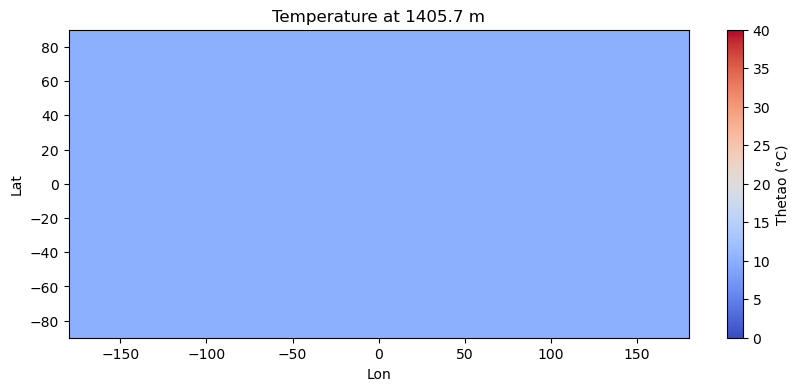

In [3]:
import matplotlib.pyplot as plt


lat2d = woa["lat"].values
lon2d = woa["lon"].values
depth_index = 22  # choose depth once
depth_value = float(woa["z"].isel(z=depth_index))


thetao_plot = woa["thetao"].isel(z=depth_index)
so_plot     = woa["so"].isel(z=depth_index)

plt.figure(figsize=(10,4))
plt.pcolormesh(lon2d, 
               lat2d, 
               thetao_plot, 
               cmap="coolwarm", 
               shading="auto",
               vmin=0,   # minimum of color scale
               vmax=40   # maximum of color scale
               )
plt.colorbar(label="Thetao (°C)")
plt.title(f"Temperature at {depth_value:.1f} m")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.show()

In [7]:
print(lat2d.shape, lon2d.shape, thetao_plot.shape)


(180, 360) (180, 360) (12, 180, 360)


In [24]:
woa['thetao']

<xarray.DataArray 'thetao' (z: 31, y: 180, x: 360)> Size: 16MB
[2008800 values with dtype=float64]
Coordinates:
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x